# Tratamiento de Valores Nulos

### Importar Librerías

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import data_util as util

### Importar los datos

In [2]:
ruta = '../data/calidad_aire_2022.csv'
ruta_nuevoCSV = '../data/calidad_aire_2022_clean_nulos.csv'
df = pd.read_csv(ruta, delimiter=',', engine='python', index_col=0)
df.head()

,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,NO2,PM2.5,PM10,O3,TEMPERATURA,PRECIPITACION,DIR_VIENTO,VEL_VIENTO
FECHA,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2022.0,1.0,1.0,0,Sabado,8.0,4.0,35.0,15.0,16.0,18.39,11.1,0.0,NaN,NaN
2022-01-01 01:00:00,2022.0,1.0,1.0,1,Sabado,8.0,4.0,48.0,25.0,27.0,8.18,11.1,0.0,NaN,NaN
2022-01-01 02:00:00,2022.0,1.0,1.0,2,Sabado,8.0,3.0,47.0,25.0,27.0,7.05,11.1,0.0,NaN,NaN
2022-01-01 03:00:00,2022.0,1.0,1.0,3,Sabado,8.0,3.0,38.0,15.0,17.0,14.22,11.1,0.0,NaN,NaN
2022-01-01 04:00:00,2022.0,1.0,1.0,4,Sabado,8.0,3.0,26.0,3.0,5.0,24.66,11.1,0.0,NaN,NaN


#### Cantidad de Registros Importados

In [3]:
df.shape

(8737, 15)

#### Identificación de los tipos de columnas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8737 entries, 2022-01-01 00:00:00 to 2022-12-31 00:00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ANO            8737 non-null   float64
 1   MES            8737 non-null   float64
 2   DIA            8737 non-null   float64
 3   HORA           8737 non-null   int64  
 4   DIA_SEMANA     8737 non-null   object 
 5   ESTACION       8737 non-null   float64
 6   SO2            8646 non-null   float64
 7   NO2            8669 non-null   float64
 8   PM2.5          7495 non-null   float64
 9   PM10           7480 non-null   float64
 10  O3             8540 non-null   float64
 11  TEMPERATURA    8737 non-null   float64
 12  PRECIPITACION  8737 non-null   float64
 13  DIR_VIENTO     6577 non-null   float64
 14  VEL_VIENTO     6577 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 1.1+ MB


### Estadística Descriptiva

In [5]:
##estadísticas descriptivas
df.describe().round(1)

,ANO,MES,DIA,HORA,ESTACION,SO2,NO2,PM2.5,PM10,O3,TEMPERATURA,PRECIPITACION,DIR_VIENTO,VEL_VIENTO
count,8737.0,8737.0,8737.0,8737.0,8737.0,8646.0,8669.0,7495.0,7480.0,8540.0,8737.0,8737.0,6577.0,6577.0
mean,2022.0,6.5,15.7,11.5,8.0,3.0,34.3,9.7,17.5,50.4,17.1,1.2,20.9,2.0
std,0.0,3.4,8.8,6.9,0.0,1.9,21.2,8.9,19.2,30.0,8.0,3.8,19.8,0.8
min,2022.0,1.0,1.0,0.0,8.0,0.0,3.0,1.0,1.0,0.8,3.8,0.0,1.0,0.3
25%,2022.0,4.0,8.0,5.0,8.0,1.0,19.0,4.0,7.0,27.8,9.8,0.0,6.0,1.4
50%,2022.0,7.0,16.0,11.0,8.0,3.0,29.0,8.0,13.0,49.8,16.0,0.0,22.0,1.9
75%,2022.0,10.0,23.0,17.0,8.0,4.0,45.0,13.0,22.0,69.2,23.0,0.1,26.0,2.5
max,2022.0,12.0,31.0,23.0,8.0,12.0,161.0,105.0,322.0,181.0,33.4,26.6,99.0,5.3


### Tratamiento Nulos

####  1. Identifica valores nulos

In [6]:
util.calc_missing(df)

SO2 91 / 8737= 1.04 %
NO2 68 / 8737= 0.78 %
PM2.5 1242 / 8737= 14.22 %
PM10 1257 / 8737= 14.39 %
O3 197 / 8737= 2.25 %
DIR_VIENTO 2160 / 8737= 24.72 %
VEL_VIENTO 2160 / 8737= 24.72 %


#####  1.1. Visualización de los valores nulos en la gráfica

<Axes: >

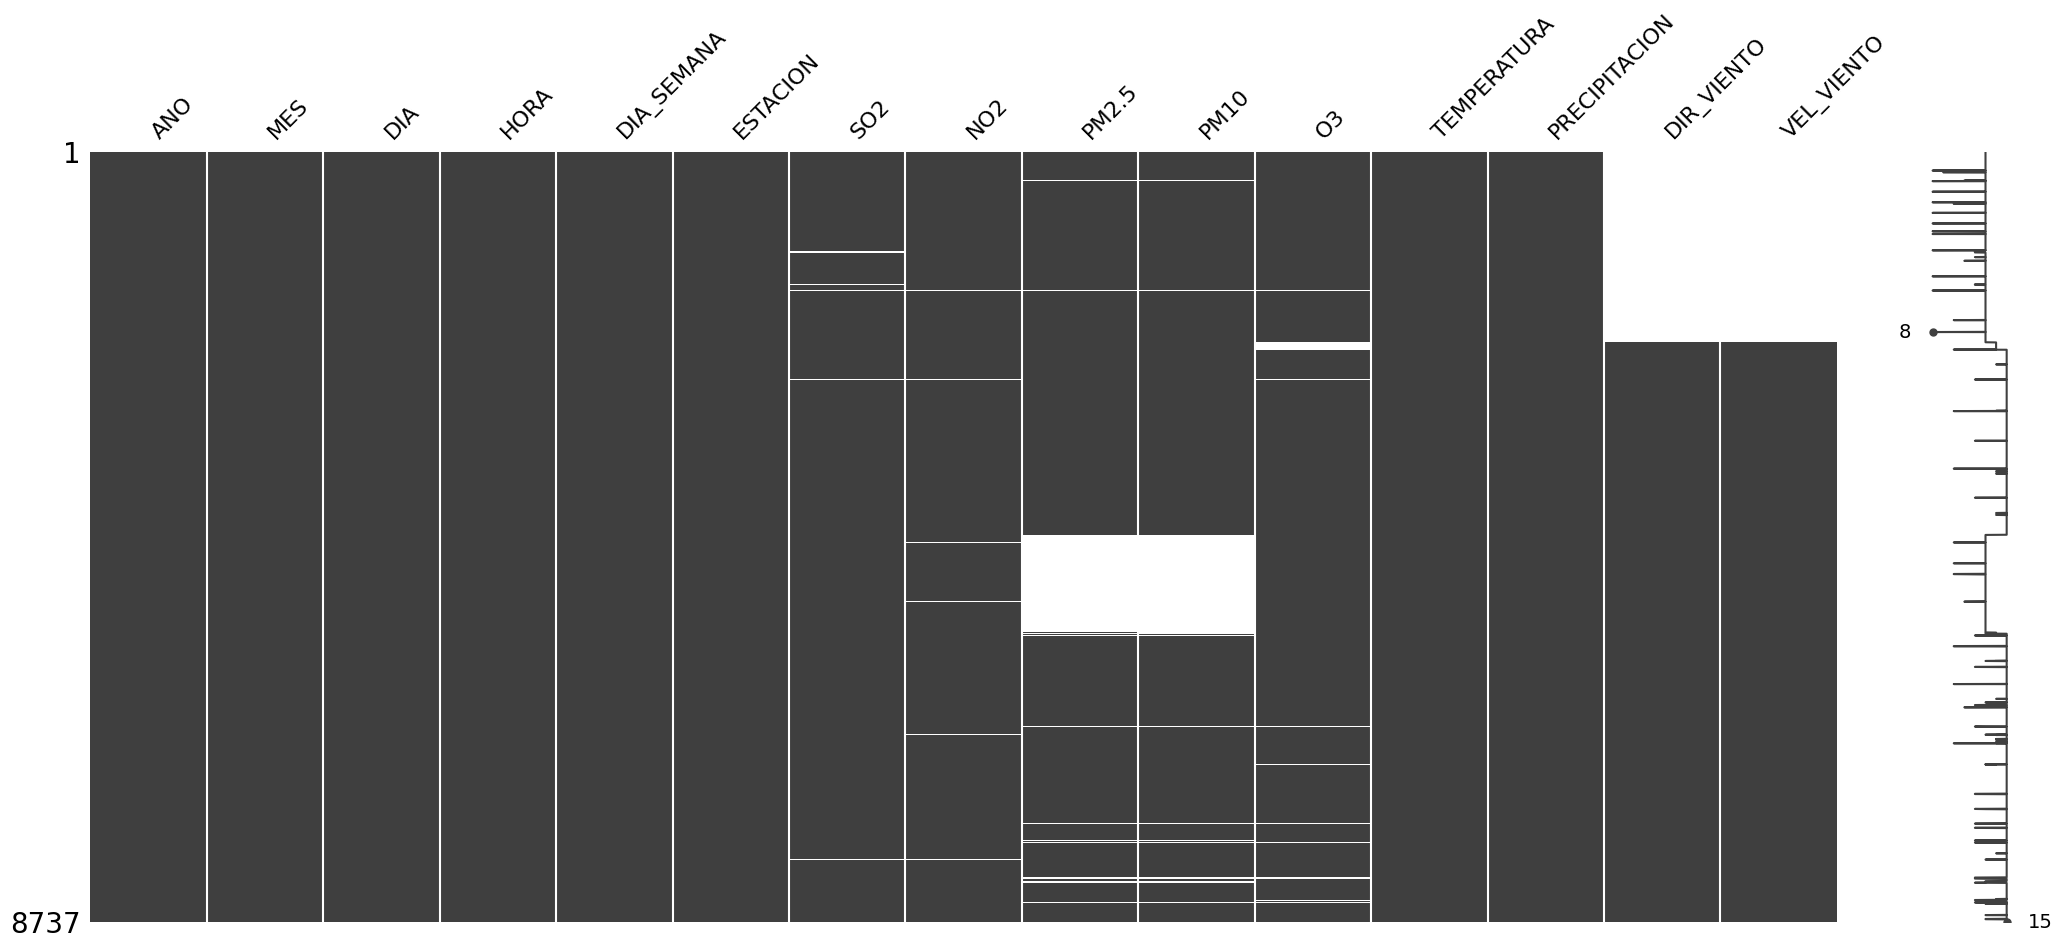

In [7]:

%matplotlib inline
msno.matrix(df)

#####  1.2. Rellena las columnas que contienen valor nulo una prediccion.

In [8]:
datos_seleccionados = df
for columna in datos_seleccionados:
    if datos_seleccionados[columna].isnull().any():
        # print(f"La columna {columna} tiene valores nulos.")
        util.fill_missing_values(df,columna)
        print(f"La columna {columna}, rellenos con predicciones")
        
df.head(2)

La columna SO2, rellenos con predicciones
La columna NO2, rellenos con predicciones
La columna PM2.5, rellenos con predicciones
La columna PM10, rellenos con predicciones
La columna O3, rellenos con predicciones
La columna DIR_VIENTO, rellenos con predicciones
La columna VEL_VIENTO, rellenos con predicciones


,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,NO2,PM2.5,PM10,O3,TEMPERATURA,PRECIPITACION,DIR_VIENTO,VEL_VIENTO
FECHA,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2022.0,1.0,1.0,0,Sabado,8.0,4.0,35.0,15.0,16.0,18.39,11.1,0.0,9.4,2.57
2022-01-01 01:00:00,2022.0,1.0,1.0,1,Sabado,8.0,4.0,48.0,25.0,27.0,8.18,11.1,0.0,9.4,2.57


Verificar si todavia hay valores nulos para las columnas selecionadas

In [9]:
df.isnull().sum()

ANO              0
MES              0
DIA              0
HORA             0
DIA_SEMANA       0
ESTACION         0
SO2              0
NO2              0
PM2.5            0
PM10             0
O3               0
TEMPERATURA      0
PRECIPITACION    0
DIR_VIENTO       0
VEL_VIENTO       0
dtype: int64

#### 1.3 Calcular el valor del INDICE DEL CALIDAD DEL AIRE (ICA) y crear las columnas correspondientes

In [10]:
util.calcular_ICA(df)

,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,NO2,PM2.5,PM10,O3,TEMPERATURA,PRECIPITACION,DIR_VIENTO,VEL_VIENTO,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
FECHA,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2022.0,1.0,1.0,0,Sabado,8.0,4.0,35.0,15.0,16.0,18.39,11.1,0.0,9.4,2.57,3.2,32.0,15.32,87.5,34.51
2022-01-01 01:00:00,2022.0,1.0,1.0,1,Sabado,8.0,4.0,48.0,25.0,27.0,8.18,11.1,0.0,9.4,2.57,3.2,54.0,6.82,120.0,46.00
2022-01-01 02:00:00,2022.0,1.0,1.0,2,Sabado,8.0,3.0,47.0,25.0,27.0,7.05,11.1,0.0,9.4,2.57,2.4,54.0,5.88,117.5,44.94
2022-01-01 03:00:00,2022.0,1.0,1.0,3,Sabado,8.0,3.0,38.0,15.0,17.0,14.22,11.1,0.0,9.4,2.57,2.4,34.0,11.85,95.0,35.81
2022-01-01 04:00:00,2022.0,1.0,1.0,4,Sabado,8.0,3.0,26.0,3.0,5.0,24.66,11.1,0.0,9.4,2.57,2.4,10.0,20.55,65.0,24.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,2022.0,12.0,30.0,20,Viernes,8.0,2.0,48.0,6.0,14.0,22.97,10.4,0.0,24.0,3.30,1.6,28.0,19.14,120.0,42.18
2022-12-30 21:00:00,2022.0,12.0,30.0,21,Viernes,8.0,2.0,45.0,7.0,16.0,20.86,10.4,0.0,24.0,3.30,1.6,32.0,17.38,112.5,40.87
2022-12-30 22:00:00,2022.0,12.0,30.0,22,Viernes,8.0,2.0,42.0,7.0,15.0,23.91,10.4,0.0,24.0,3.30,1.6,30.0,19.92,105.0,39.13


Verficar que exiten valores nulos

In [11]:
df.isnull().sum()

ANO              0
MES              0
DIA              0
HORA             0
DIA_SEMANA       0
ESTACION         0
SO2              0
NO2              0
PM2.5            0
PM10             0
O3               0
TEMPERATURA      0
PRECIPITACION    0
DIR_VIENTO       0
VEL_VIENTO       0
ICA_SO2          0
ICA_PM10         0
ICA_O3           0
ICA_NO2          0
ICA              0
dtype: int64

#####  1.4. Genera el CSV después del pocesamiento de los valores nulos

In [12]:
df.to_csv(ruta_nuevoCSV, index=False)